# Lab 16 -- PCR
## Lecture 16

In [1]:
d = read.csv('data/tcga/smaller.csv',row.names=1)

In [2]:
dim(d)

[1]  99 199

In [3]:
head(d)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_189,gene_190,gene_191,gene_192,gene_193,gene_194,gene_195,gene_196,gene_197,gene_198
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sample_0,0,2.0172093,3.265527,5.478487,10.431999,0,7.175175,0.5918709,0,0,...,5.305383,2.1858983,9.149747,10.365951,9.650743,11.16036,6.287023,10.081177,6.865820,11.22720
sample_1,0,0.5927321,1.588421,7.586157,9.623011,0,6.816049,0.0000000,0,0,...,5.539965,1.1747899,8.719560,9.347012,9.306249,10.23886,7.213289,8.055863,1.590818,10.79442
sample_2,0,3.5117590,4.327199,6.881787,9.870730,0,6.972130,0.4525954,0,0,...,4.981168,1.9811220,9.198794,8.341470,5.363374,11.38310,0.000000,8.841310,1.306846,11.25683
sample_3,0,3.6636179,4.507649,6.659068,10.196184,0,7.843375,0.4348817,0,0,...,5.285154,1.9314183,8.948980,9.397715,8.979462,11.02650,2.941858,9.808412,7.257133,10.99856
sample_4,0,2.6557411,2.821547,6.539454,9.738265,0,6.566967,0.3609822,0,0,...,8.466717,1.0956544,8.548953,8.324757,7.688215,10.64256,6.921805,9.116466,1.831269,10.81936
sample_5,0,3.4678533,3.581918,6.620243,9.706829,0,7.758510,0.0000000,0,0,...,5.691129,0.8942939,9.042770,9.719038,8.373361,11.21062,7.328451,8.491661,5.324544,11.05680


In [4]:
d = as.matrix(d)

In [5]:
w0 = which(apply(d,2,sd)==0)

In [6]:
d = d[,-w0]
dim(d)

[1]  99 195

In [7]:
y = d[,5]
X = d[,-5]

In [8]:
head(y)

sample_0  sample_1  sample_2  sample_3  sample_4  sample_5 
10.431999  9.623011  9.870730 10.196184  9.738265  9.706829

In [9]:
X[1:5,1:5]

,gene_0,gene_1,gene_2,gene_3,gene_6
sample_0,0,2.0172093,3.265527,5.478487,7.175175
sample_1,0,0.5927321,1.588421,7.586157,6.816049
sample_2,0,3.5117590,4.327199,6.881787,6.972130
sample_3,0,3.6636179,4.507649,6.659068,7.843375
sample_4,0,2.6557411,2.821547,6.539454,6.566967


In [10]:
sigma = apply(X,2,sd)
mus = colMeans(X)
X = scale(X,scale=TRUE,center=TRUE)
head(X)

,gene_0,gene_1,gene_2,gene_3,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,...,gene_189,gene_190,gene_191,gene_192,gene_193,gene_194,gene_195,gene_196,gene_197,gene_198
sample_0,-0.201298,-0.6515548,0.1031693,-1.68518935,-0.1591481,0.41783825,-0.1005038,-0.1005038,-0.02967068,0.6909780,...,-0.9583516,0.3391115,-0.045354634,2.5271548,1.2030218,0.7865945,-0.59002878,1.47334000,1.8454372,0.8856613
sample_1,-0.201298,-1.7928905,-1.6704314,1.18216889,-0.5123618,-0.84960659,-0.1005038,-0.1005038,-0.74504538,-0.2722345,...,-0.8118508,-0.4816728,-0.524253111,0.9485714,0.7410154,-0.9695351,-0.11902052,-1.01847165,-0.5573988,-0.1130113
sample_2,-0.201298,0.5459252,1.2259258,0.22391628,-0.3588509,0.11959088,-0.1005038,-0.1005038,-0.74504538,-0.4467624,...,-1.1608302,0.1728809,0.009245631,-0.6092584,-4.5468289,1.2110676,-3.78699535,-0.05211021,-0.6867520,0.9540422
sample_3,-0.201298,0.6675993,1.4167583,-0.07907906,0.4980507,0.08165835,-0.1005038,-0.1005038,-0.74504538,-0.4696204,...,-0.9709849,0.1325331,-0.268854744,1.0271227,0.3027578,0.5314809,-2.29105371,1.13774847,2.0236858,0.3580567
sample_4,-0.201298,-0.1399431,-0.3663557,-0.24180771,-0.7573430,-0.07659156,-0.1005038,-0.1005038,-0.74504538,0.6155652,...,1.0159595,-0.5459124,-0.714178499,-0.6351514,-1.4289518,-0.2001985,-0.26724069,0.28642401,-0.4478698,-0.0554580
sample_5,-0.201298,0.5107466,0.4377639,-0.13189811,0.4145829,-0.84960659,-0.1005038,-0.1005038,-0.12208677,-0.3657060,...,-0.7174461,-0.7093702,-0.164444881,1.5249297,-0.5100931,0.8823635,-0.06046058,-0.48229482,1.1433650,0.4924463


In [11]:
sum(!is.finite(X))

[1] 0

### use regression!?

In [12]:
lmod = lm(y~X)
lmod


Call:
lm(formula = y ~ X)

Coefficients:
(Intercept)      Xgene_0      Xgene_1      Xgene_2      Xgene_3      Xgene_6  
    9.87867     -0.24473     -2.57194     -1.46960     -0.43962      2.79716  
    Xgene_7      Xgene_8      Xgene_9     Xgene_10     Xgene_11     Xgene_12  
   -3.83243      3.84923     -1.01300     -1.74333     -2.51257      0.86318  
   Xgene_13     Xgene_14     Xgene_17     Xgene_18     Xgene_19     Xgene_20  
    1.79826     -1.44417     -0.13890     -2.99392     -0.28364     -0.44764  
   Xgene_21     Xgene_22     Xgene_24     Xgene_25     Xgene_26     Xgene_27  
   -0.94017      0.45182      3.46188      2.58434     -2.27134      1.94380  
   Xgene_28     Xgene_29     Xgene_30     Xgene_31     Xgene_32     Xgene_33  
   -0.04829      2.03449     -0.45545     -1.79201     -0.17453      2.05494  
   Xgene_34     Xgene_35     Xgene_36     Xgene_37     Xgene_38     Xgene_39  
   -0.89849      3.09927      4.60002      0.18746     -2.15848      2.03269  
   Xgene_4

In [13]:
X_design = model.matrix(lmod)
kappa(t(X_design)%*%X_design)

[1] 2.136971e+19

In [14]:
library('pls')

Warning message:
"package 'pls' was built under R version 4.0.4"

Attaching package: 'pls'


The following object is masked from 'package:stats':

    loadings




In [15]:
?pcr

mvr {pls},R Documentation
formula,a model formula. Most of the lm formula constructs are supported. See below.
ncomp,the number of components to include in the model (see below).
Y.add,a vector or matrix of additional responses containing relevant information about the observations. Only used for cppls.
data,an optional data frame with the data to fit the model from.
subset,an optional vector specifying a subset of observations to be used in the fitting process.
na.action,"a function which indicates what should happen when the data contain missing values. The default is set by the na.action setting of options, and is na.fail if that is unset. The ‘factory-fresh’ default is na.omit. Another possible value is NULL, no action. Value na.exclude can be useful. See na.omit for other alternatives."
method,"the multivariate regression method to be used. If ""model.frame"", the model frame is returned."
scale,"numeric vector, or logical. If numeric vector, X is scaled by dividing each variable with the corresponding element of scale. If scale is TRUE, X is scaled by dividing each variable by its sample standard deviation. If cross-validation is selected, scaling by the standard deviation is done for every segment."
center,"logical, determines if the X and Y matrices are mean centered or not. Default is to perform mean centering."
validation,character. What kind of (internal) validation to use. See below.


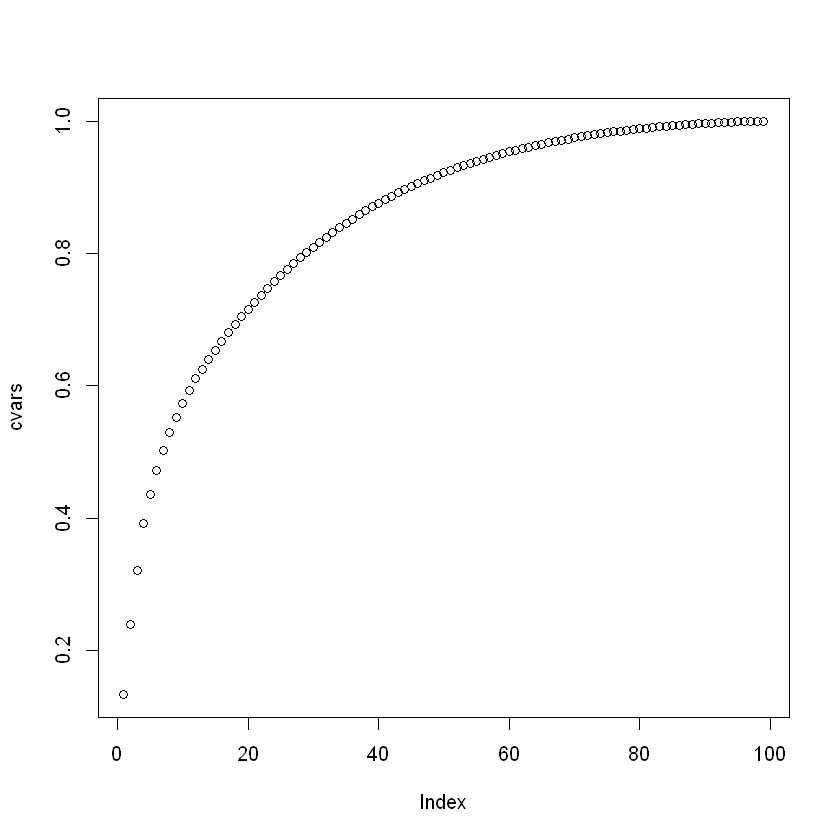

In [18]:
vars = svd(X)$d^2
cvars = cumsum(vars/sum(vars))
plot(cvars)

In [20]:
which.max(cvars>.8)

[1] 29

In [21]:
pcrmod = pcr(y~X,ncomp=29)

In [22]:
summary(pcrmod)

Data: 	X dimension: 99 194 
	Y dimension: 99 1
Fit method: svdpc
Number of components considered: 29
TRAINING: % variance explained
   1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X    13.31    23.86    32.05    39.20    43.60    47.22    50.19    52.95
y    24.15    28.15    28.20    44.02    48.79    54.78    55.60    57.22
   9 comps  10 comps  11 comps  12 comps  13 comps  14 comps  15 comps
X    55.24     57.35     59.29     61.07     62.54     63.99     65.37
y    63.79     66.54     66.54     67.47     69.28     69.28     69.30
   16 comps  17 comps  18 comps  19 comps  20 comps  21 comps  22 comps
X     66.74     68.01     69.26     70.46     71.60     72.68     73.73
y     69.84     70.17     71.30     71.31     72.41     74.86     74.87
   23 comps  24 comps  25 comps  26 comps  27 comps  28 comps  29 comps
X     74.78     75.78     76.74     77.63     78.51     79.36     80.18
y     74.89     75.32     75.92     76.24     78.17     78.94     79.13


In [23]:
pcr_preds = predict(pcrmod,ncomp=29)

In [24]:
head(pcr_preds)

, , 29 comps

                 y
sample_0 10.227083
sample_1  9.697180
sample_2  9.893289
sample_3 10.024731
sample_4  9.978449
sample_5  9.901547

## coding it by hand

In [25]:
V = svd(X,nv=29)$v

In [27]:
Z = X%*%V

In [28]:
head(Z)

sample_0,-4.620650,-10.64170281,0.7897304,0.2099982,-1.234794,1.1331955,-1.7878727,0.61100176,-0.06076980,2.748160,...,-1.7653053,0.4734959,-1.4693989,2.11123326,-0.7032793,1.2682798,-2.313864904,0.2387308,1.78509946,-0.95010613
sample_1,1.048701,0.84476895,1.8103866,-4.6252135,4.218231,-0.3973722,-4.4543360,3.69276861,-2.25202115,1.011999,...,1.8853737,-1.3537319,-2.7579610,-2.77343424,-2.2559403,-0.5294275,-1.328856927,-2.1184743,-0.08243727,1.17082495
sample_2,5.684205,-2.35361105,7.1867093,2.1452923,-4.449499,1.7008605,-4.9948123,-2.91686678,-1.58708800,-3.362102,...,0.2105591,-0.4191764,-2.2951677,-2.81859312,-3.0672393,-0.3059869,-2.197493728,1.7770626,-0.27544255,-0.81606174
sample_3,2.917327,-6.07003189,3.5222048,2.8942079,-2.140674,-0.8282406,-1.9995565,0.23423597,0.03737866,1.299863,...,1.8689749,-2.0151751,1.5779600,0.56239483,0.6804030,1.8979143,0.167955975,0.1097083,1.21986995,-0.07238057
sample_4,5.441731,-0.01512706,-3.1059412,0.7610437,-1.214894,-0.8747083,-0.7038480,0.01517819,0.39499231,-1.765715,...,1.6942005,0.3468748,-0.2473332,1.78483600,-0.4998608,0.6399551,0.118868348,-0.1902847,-1.12735110,-2.01141248
sample_5,-2.816385,-5.38886361,2.6437631,4.4903463,-0.247850,0.6820079,0.8883802,-0.06665883,-1.78972216,1.851137,...,1.2615412,1.4189235,-1.6166943,-0.07234497,1.4173151,-4.9913991,0.004713527,0.8436816,1.05780868,-1.74817593


In [29]:
dim(Z)

[1] 99 29

In [30]:
hm = lm(y~Z)

In [31]:
summary(hm)


Call:
lm(formula = y ~ Z)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.80606 -0.14617  0.00703  0.16903  0.68434 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.879e+00  2.960e-02 333.749  < 2e-16 ***
Z1           5.231e-02  5.854e-03   8.935 3.92e-13 ***
Z2          -2.393e-02  6.578e-03  -3.638 0.000527 ***
Z3          -2.804e-03  7.461e-03  -0.376 0.708195    
Z4          -5.778e-02  7.988e-03  -7.233 5.02e-10 ***
Z5          -4.044e-02  1.018e-02  -3.971 0.000173 ***
Z6           4.992e-02  1.122e-02   4.448 3.24e-05 ***
Z7          -2.045e-02  1.239e-02  -1.651 0.103369    
Z8           2.977e-02  1.287e-02   2.312 0.023740 *  
Z9           6.572e-02  1.410e-02   4.660 1.49e-05 ***
Z10          4.438e-02  1.472e-02   3.015 0.003596 ** 
Z11         -9.513e-04  1.530e-02  -0.062 0.950594    
Z12          2.816e-02  1.604e-02   1.755 0.083620 .  
Z13          4.305e-02  1.759e-02   2.447 0.016959 *  
Z14          1.719e-05  1.777

In [32]:
head(coef(hm))

(Intercept)           Z1           Z2           Z3           Z4           Z5 
 9.878673853  0.052305109 -0.023927031 -0.002804101 -0.057779183 -0.040437638

In [33]:
hm_preds = predict(hm)

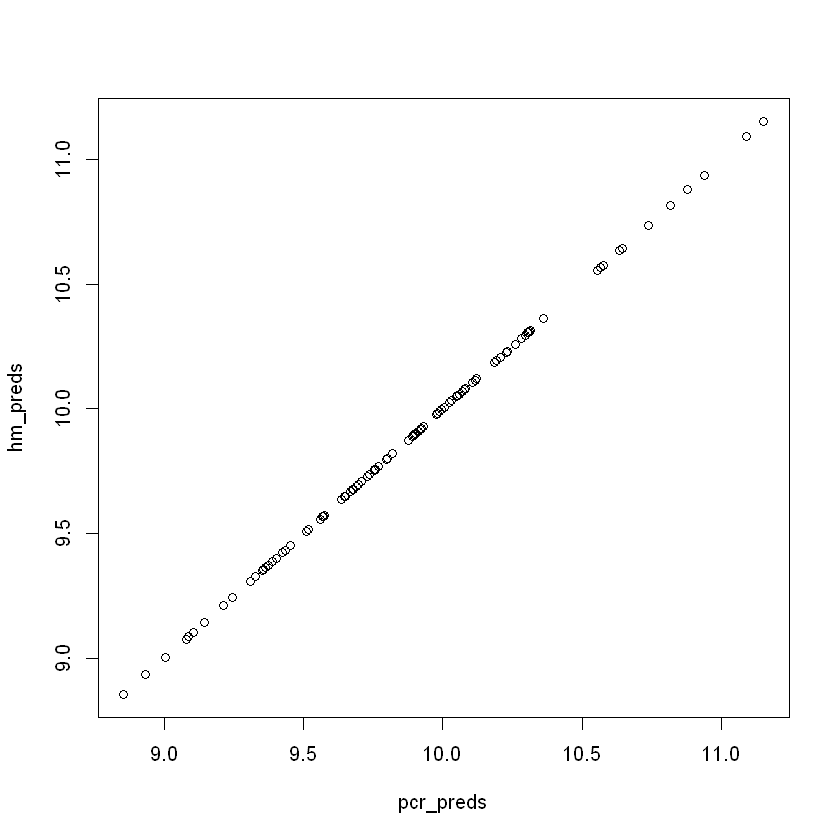

In [34]:
plot(pcr_preds,hm_preds)

In [36]:
beta_pcr = V%*%array(coef(hm)[-1],c(29,1))

In [37]:
head(beta_pcr)

-0.018057860
-0.008132180
-0.006389430
-0.004879774
-0.010565601
-0.022129547


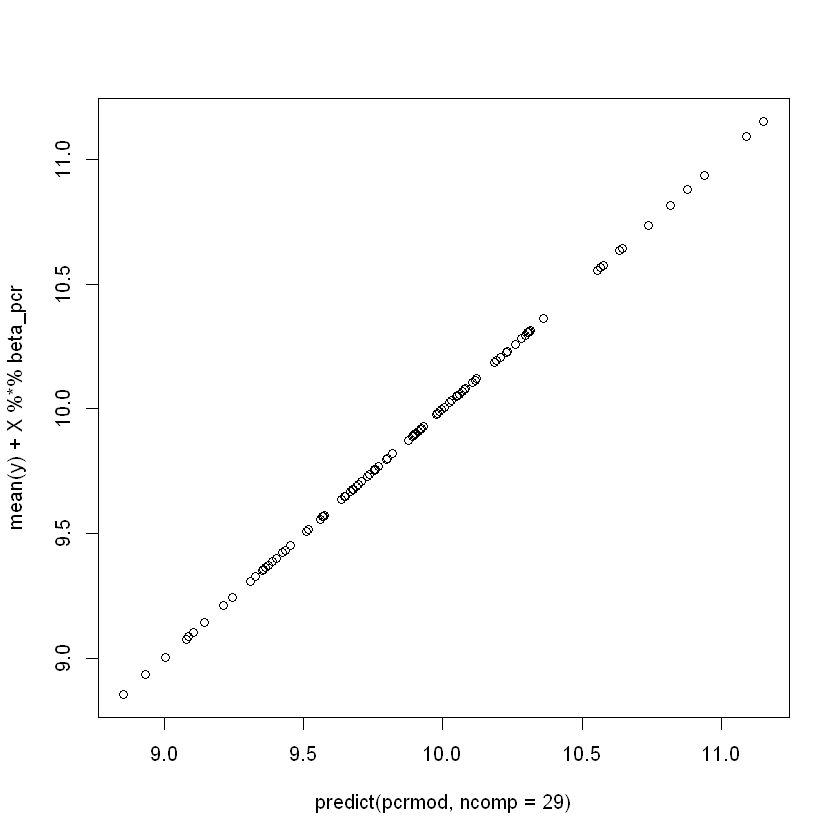

In [38]:
plot(predict(pcrmod,ncomp=29),mean(y)+X%*%beta_pcr)

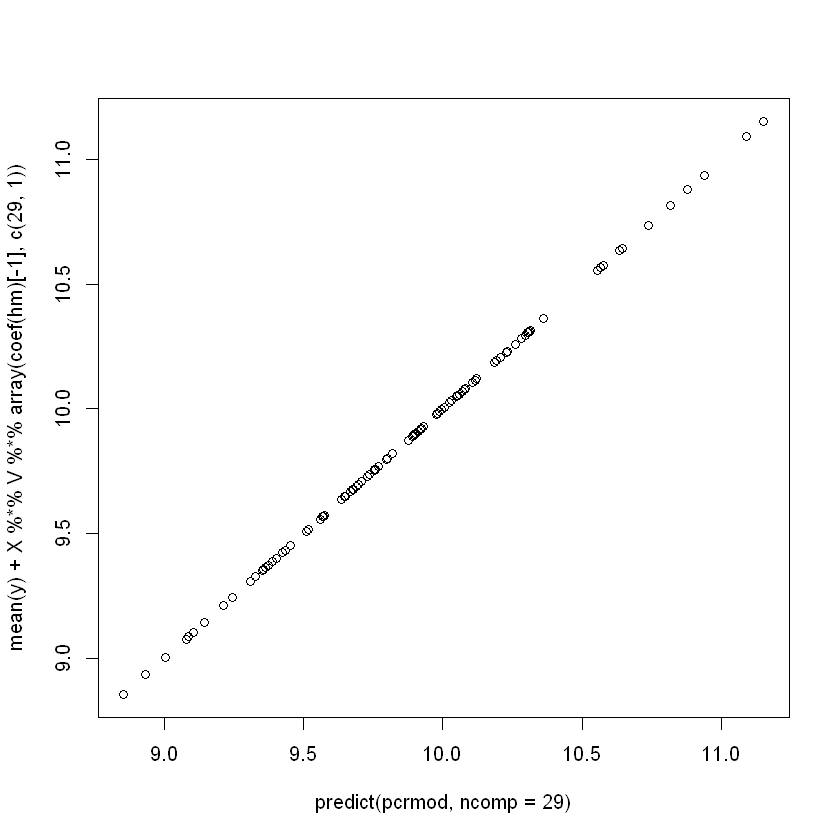

In [44]:
plot(predict(pcrmod,ncomp=29),mean(y)+X%*%V%*%array(coef(hm)[-1],c(29,1)))

In [45]:
newx = rnorm(ncol(X))
newx = data.frame(t(newx))
colnames(newx) = colnames(X)
head(newx)

,gene_0,gene_1,gene_2,gene_3,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,...,gene_189,gene_190,gene_191,gene_192,gene_193,gene_194,gene_195,gene_196,gene_197,gene_198
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.4299776,-0.6010414,1.381247,1.479904,0.7587224,1.317629,-0.9424434,-0.3766649,-0.1221218,-0.2796206,...,-0.3841245,0.5434941,0.6733811,-1.110408,0.4510546,-0.709038,0.0416571,-0.3264535,0.7029621,-0.4069859


In [46]:
predict(pcrmod,as.matrix(newx),ncomp=29)

, , 29 comps

            y
[1,] 9.647239

In [47]:
as.numeric(mean(y)+as.matrix(newx)%*%beta_pcr)

[1] 9.647239